<a href="https://colab.research.google.com/github/Chaitanya-Waphare/Credit-Card-Holder-Risk/blob/main/CreditCardFraudDetection_PCA_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

**Read Dataset**

In [5]:
project_df = pd.read_csv("Customer Data (1).csv")
project_df = project_df.drop(columns=['CUST_ID'])

**Identify Duplicate Values and Missing Value in the Dataset**

In [6]:
print("Missing Elements in dataframe: ", project_df.isna().sum().sum())
print("Duplicate Elements in dataframe: ", project_df.duplicated().sum())

Missing Elements in dataframe:  314
Duplicate Elements in dataframe:  0


**Replace all Missing Elements with the Column Mean**

In [7]:
project_df.fillna(project_df.mean(), inplace=True)
print("The missing values after handling are: ", project_df.isna().sum().sum())

The missing values after handling are:  0


**Standardize the Dataset**

In [9]:
scaler = StandardScaler()
Model_Data_std = scaler.fit_transform(project_df)

**PCA Model**

In [10]:
pca = PCA()
pca1 = pca.fit_transform(Model_Data_std)
print(pca)

PCA()


**Summary of PCA**

In [11]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[2.72900372e-01 2.03019913e-01 8.79197945e-02 7.47997502e-02
 6.26279204e-02 5.75021129e-02 4.88723464e-02 4.25748554e-02
 3.82880445e-02 3.08000623e-02 2.37189739e-02 1.77363237e-02
 1.42649185e-02 1.21736915e-02 1.01298988e-02 2.67033632e-03
 6.85223491e-07]


**Biplot**

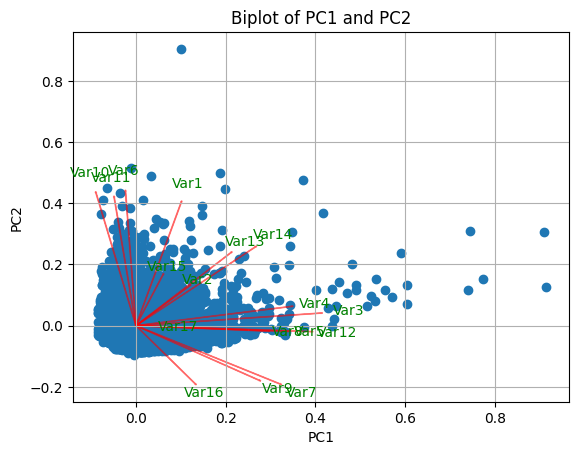

In [12]:
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i + 1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

biplot(pca1[:, 0:2], np.transpose(pca.components_))
plt.title("Biplot of PC1 and PC2")
plt.show()

**OutLiers Plot**

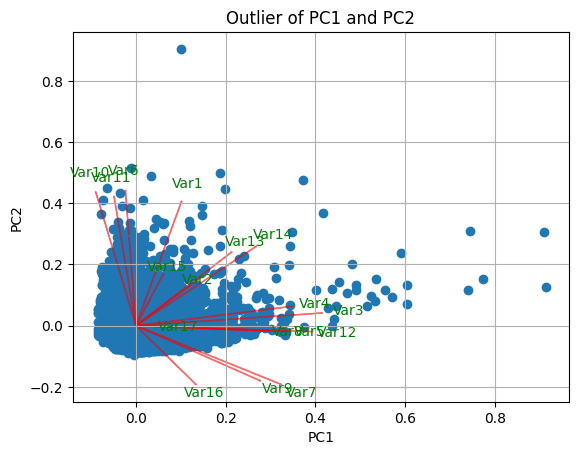

In [13]:
biplot(pca1[:, 0:2], np.transpose(pca.components_))
plt.title("Outlier of PC1 and PC2")
plt.show()

**Explained Variance Ratio**

In [14]:
pca1_sdev = np.std(pca1, axis=0)
loads = pca.components_
print(loads)
scores = pca1
print(scores)

[[ 1.01077495e-01  1.20043419e-01  4.11641555e-01  3.46407027e-01
   3.36814315e-01 -2.33432386e-02  3.21492845e-01  2.94633202e-01
   2.74709742e-01 -8.91390280e-02 -4.86539449e-02  3.90695242e-01
   2.11662921e-01  2.66248975e-01  6.03512816e-02  1.32112309e-01
   8.10205017e-02]
 [ 4.03957216e-01  1.30537052e-01  4.10378642e-02  6.28718737e-02
  -1.85327951e-02  4.39241530e-01 -1.90780251e-01 -1.79238154e-02
  -1.78600911e-01  4.34082323e-01  4.19733864e-01 -1.93940823e-02
   2.38677935e-01  2.57476073e-01  1.66969516e-01 -1.90025512e-01
  -4.32647646e-03]
 [-1.60075041e-01 -4.20629874e-01  2.57902734e-01  3.92114887e-01
  -1.10488391e-01 -2.73454003e-02 -3.74691466e-01  1.15130725e-01
  -4.73409191e-01 -1.09072169e-01 -1.15540504e-01 -7.73306395e-02
   1.00483443e-01  2.76236518e-01 -2.21634615e-01  1.24773556e-01
  -6.43260207e-02]
 [ 2.83453583e-01  1.49742162e-01  3.91113668e-02  7.81546720e-02
  -5.11302809e-02 -2.54585773e-01 -1.88974864e-01  2.74645771e-02
  -2.15001830e-01 -

**Select Number of PCs**

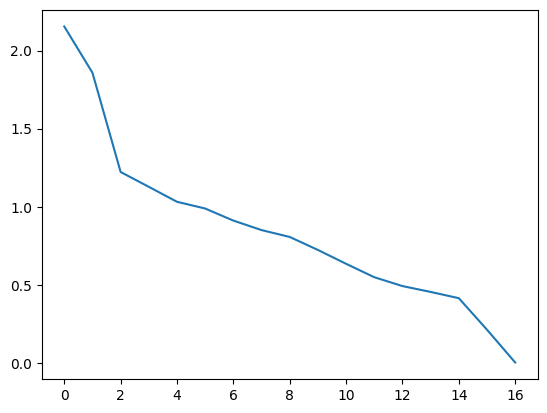

In [15]:
plt.plot(pca1_sdev)
plt.show()

**Calculate Cumulative Explained Vaiance**

In [16]:
cumulative_variance = np.cumsum(explained_variance)
print(cumulative_variance)

[0.27290037 0.47592029 0.56384008 0.63863983 0.70126775 0.75876986
 0.80764221 0.85021707 0.88850511 0.91930517 0.94302415 0.96076047
 0.97502539 0.98719908 0.99732898 0.99999931 1.        ]


**VIP Calculation**

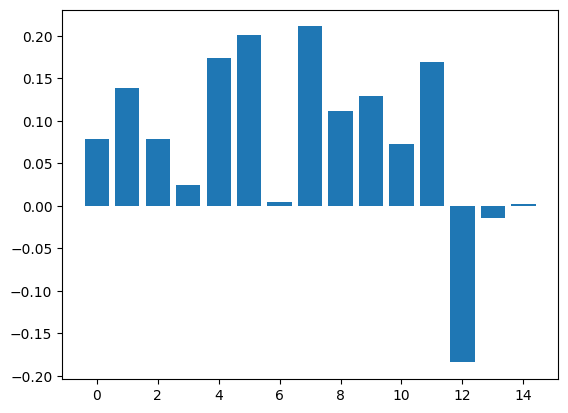

        PC1       PC2
0 -1.682220 -1.076451
1 -1.138295  2.506477
2  0.969684 -0.383520
3 -0.873628  0.043166
4 -1.599434 -0.688581


In [17]:
loads_vip = loads[:, :6]
property_vip = loads_vip[0, :]
features_vip = loads_vip[1:16, :]
weight_vip = property_vip * features_vip
vip = weight_vip.sum(axis=1)
plt.bar(range(len(vip)), vip)
plt.show()

pca_df = pd.DataFrame(scores[:, :2], columns=['PC1', 'PC2'])
print(pca_df.head())


**Elbow Method and Silhouette Method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

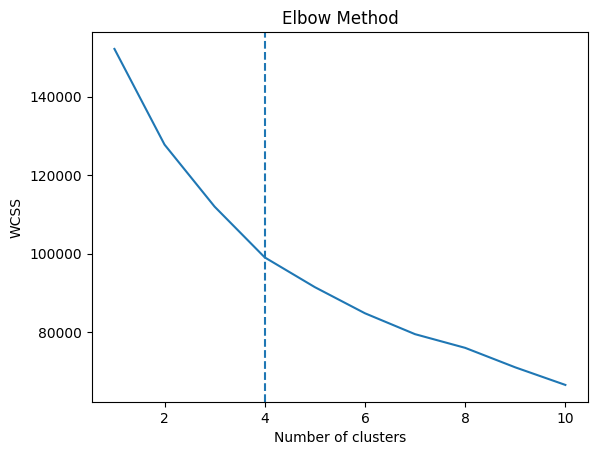

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

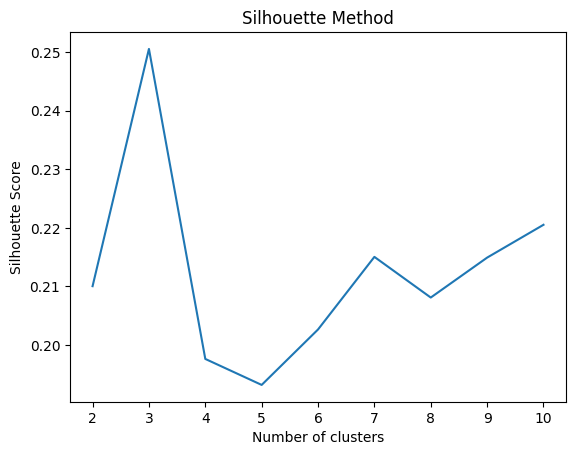

In [18]:
def elbow_method(data):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.axvline(x=4, linestyle='--')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

elbow_method(Model_Data_std)


def silhouette_method(data):
    silhouette_avg = []
    for i in range(2, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        silhouette_avg.append(silhouette_score(data, kmeans.labels_))
    plt.plot(range(2, 11), silhouette_avg)
    plt.title('Silhouette Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

silhouette_method(Model_Data_std)


**K-Means With K = 7**

In [19]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(Model_Data_std)
pca_df['clusterNum'] = kmeans.labels_

fig = px.scatter(pca_df, x='PC1', y='PC2', color='clusterNum')
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


**OverLap with K = 7, Adjust to K = 6**

In [20]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(Model_Data_std)

fig = px.scatter(pca_df, x='PC1', y='PC2', color=kmeans.labels_)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



**Density Based Clusturing**

In [21]:
neigh = NearestNeighbors(n_neighbors=20)
nbrs = neigh.fit(pca_df)
distances, indices = nbrs.kneighbors(pca_df)

**Plot K-Distance Graph**

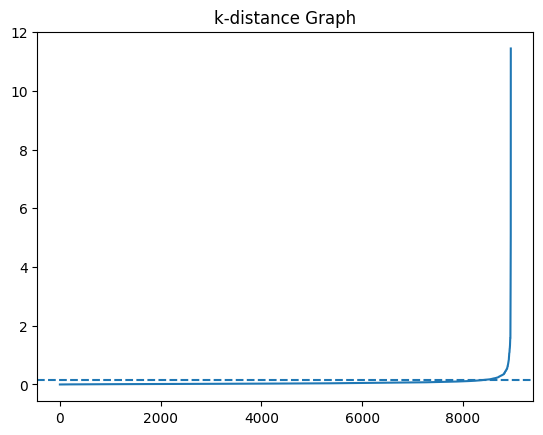

In [22]:
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.axhline(y=0.15, linestyle='--')
plt.title('k-distance Graph')
plt.show()

**Apply DBSCAN**

In [23]:
db = DBSCAN(eps=0.15, min_samples=20).fit(pca_df)
pca_df['clusterNum'] = db.labels_

fig = px.scatter(pca_df, x='PC1', y='PC2', color='clusterNum')
fig.show()

**Model Based Clustering**

In [24]:
mb = GaussianMixture(n_components=6, random_state=42)
mb.fit(Model_Data_std)
pca_df['clusterNum'] = mb.predict(Model_Data_std)

fig = px.scatter(pca_df, x='PC1', y='PC2', color='clusterNum')
fig.show()